In [52]:
import pandas as pd
import re
import numpy as np

import os
import re
import csv
import codecs
import numpy as np
import pandas as pd

In [53]:
df = pd.read_csv("../data/processed/clean_data.csv")

df = df.sample(frac=0.4).reset_index(drop=True)

In [54]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,unigram_ques1,unigram_ques2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share,common_word_ratio,words
0,124269,200710,200711,what are the legal and ethical issues related ...,what are the politically divisive issues in yo...,0,"['issues', 'boytting', 'legal', 'goods', 'untr...","['level', 'issues', 'would', 'bizarre', 'peopl...",1,1,83,142,15,25,2,0.125,"['level', 'issues', 'would', 'bizarre', 'boytt..."
1,227472,336330,336331,how can we remove democracy from india,what was the biggest blunder made by the vajpa...,0,"['india', 'remove', 'democracy']","['blunder', 'made', 'biggest', 'government', '...",1,1,39,61,8,11,0,0.000,"['remove', 'made', 'india', 'vajpayee', 'bigge..."
2,15911,30359,30360,is watching fox news addictive,is watching fox news bad for you,0,"['fox', 'news', 'addictive', 'watching']","['fox', 'news', 'bad', 'watching']",1,1,31,33,6,8,3,0.600,"['bad', 'watching', 'news', 'addictive', 'fox']"
3,326085,2764,94408,why did arnab goswami quitted from times now,why did arnab goswami resigned,1,"['goswami', 'arnab', 'quitted', 'times']","['resigned', 'goswami', 'arnab']",10,7,45,31,9,6,2,0.400,"['goswami', 'arnab', 'quitted', 'times', 'resi..."
4,237728,348947,292641,what should i do if my best friend is dating m...,what do i do if my best friend is dating my cr...,1,"['crush', 'friend', 'dating', 'best']","['crush', 'friend', 'dating', 'best']",2,1,54,50,13,13,4,1.000,"['dating', 'friend', 'crush', 'best']"


In [55]:
import nltk
from nltk import word_tokenize, ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
snow=nltk.stem.SnowballStemmer('english')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [56]:
def removeStopWord(word):
  token=word.split(" ")   ## coverting string to token (list of word) \\ like ["this","is","token"]
  removestop=[snow.stem(x) for x in token if x not in stop_words]   ##removing stopwords and also doing Stemming
  removed=" ".join(removestop)  ##joing back the list into sentence
  return removed

In [57]:
df['cleanQ1']=df['question1'].apply(removeStopWord)
df['cleanQ2']=df['question2'].apply(removeStopWord)

In [58]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,unigram_ques1,unigram_ques2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share,common_word_ratio,words,cleanQ1,cleanQ2
0,124269,200710,200711,what are the legal and ethical issues related ...,what are the politically divisive issues in yo...,0,"['issues', 'boytting', 'legal', 'goods', 'untr...","['level', 'issues', 'would', 'bizarre', 'peopl...",1,1,83,142,15,25,2,0.125,"['level', 'issues', 'would', 'bizarre', 'boytt...",legal ethic issu relat boyt good untri,polit divis issu untri would bizarr peopl untr...
1,227472,336330,336331,how can we remove democracy from india,what was the biggest blunder made by the vajpa...,0,"['india', 'remove', 'democracy']","['blunder', 'made', 'biggest', 'government', '...",1,1,39,61,8,11,0,0.000,"['remove', 'made', 'india', 'vajpayee', 'bigge...",remov democraci india,biggest blunder made vajpaye govern
2,15911,30359,30360,is watching fox news addictive,is watching fox news bad for you,0,"['fox', 'news', 'addictive', 'watching']","['fox', 'news', 'bad', 'watching']",1,1,31,33,6,8,3,0.600,"['bad', 'watching', 'news', 'addictive', 'fox']",watch fox news addict,watch fox news bad
3,326085,2764,94408,why did arnab goswami quitted from times now,why did arnab goswami resigned,1,"['goswami', 'arnab', 'quitted', 'times']","['resigned', 'goswami', 'arnab']",10,7,45,31,9,6,2,0.400,"['goswami', 'arnab', 'quitted', 'times', 'resi...",arnab goswami quit time,arnab goswami resign
4,237728,348947,292641,what should i do if my best friend is dating m...,what do i do if my best friend is dating my cr...,1,"['crush', 'friend', 'dating', 'best']","['crush', 'friend', 'dating', 'best']",2,1,54,50,13,13,4,1.000,"['dating', 'friend', 'crush', 'best']",best friend date crush,best friend date crush


In [59]:
from fuzzywuzzy import fuzz
Str1 = "Apple Inc."
Str2 = "apple Inc"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
print(Ratio)

95


In [60]:
df['fuzz_ratio'] = df.apply(lambda x : fuzz.ratio(x['cleanQ1'],x['cleanQ2']), axis=1)
df['Partial_Ratio']=df.apply(lambda x: fuzz.partial_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)
df['Token_Sort_Ratio']=df.apply(lambda x: fuzz.token_sort_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

df['Token_Set_Ratio']=df.apply(lambda x: fuzz.token_set_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

In [61]:
df.shape

(161582, 23)

In [62]:
features = ['freq_qid1', 'freq_qid1', 'common_word_ratio', 'fuzz_ratio']

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Fuzz Ratio')

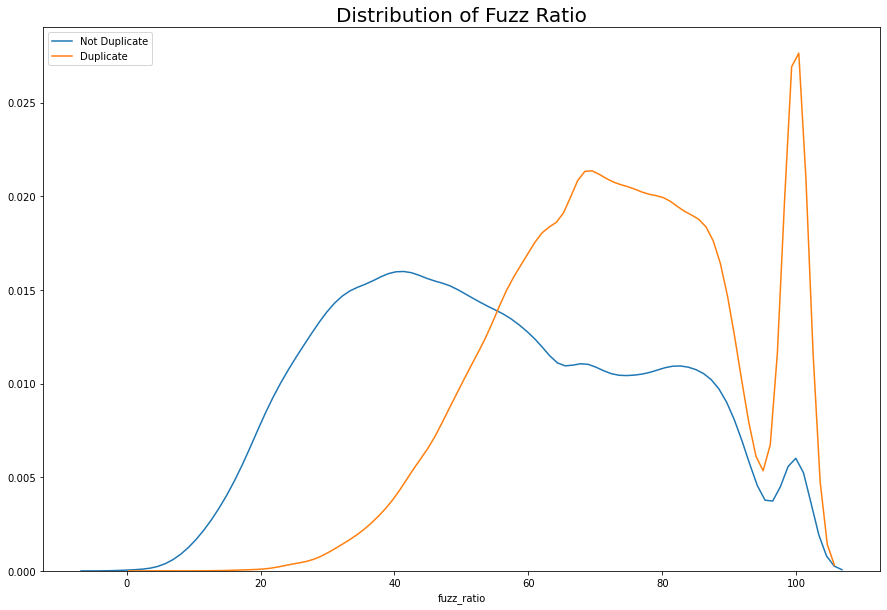

In [64]:
plt.subplots(figsize = (15,10))
sns.distplot(df[df.is_duplicate == 0].fuzz_ratio, kde=True, hist=False, label = 'Not Duplicate')
sns.distplot(df[df.is_duplicate ==1].fuzz_ratio, kde = True, hist=False, label = 'Duplicate')
plt.title('Distribution of Fuzz Ratio', size = 20)

Text(0.5, 1.0, 'Distribution of Partial Fuzz Ratio')

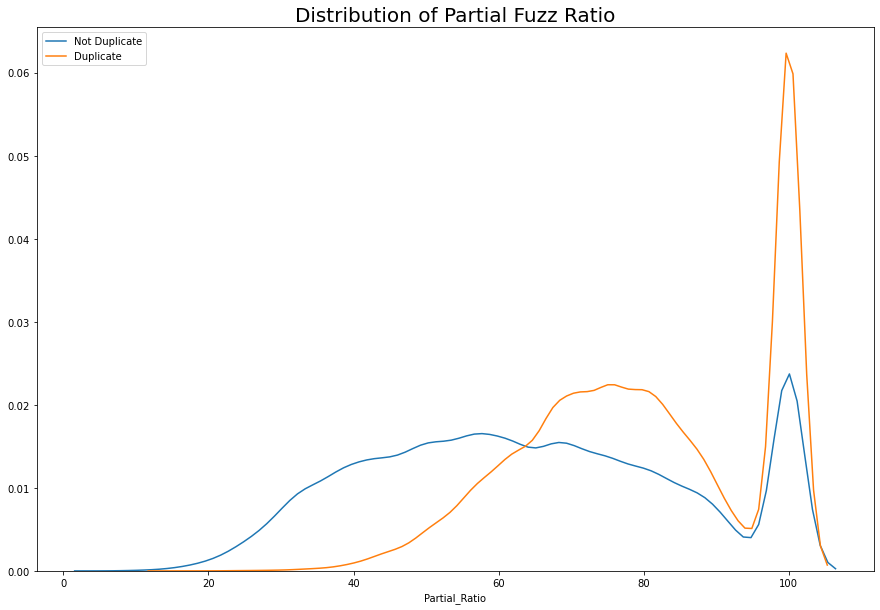

In [65]:
plt.subplots(figsize = (15,10))
sns.distplot(df[df.is_duplicate == 0].Partial_Ratio, kde=True, hist=False, label = 'Not Duplicate')
sns.distplot(df[df.is_duplicate ==1].Partial_Ratio, kde = True, hist=False, label = 'Duplicate')
plt.title('Distribution of Partial Fuzz Ratio', size = 20)

Text(0.5, 1.0, 'Distribution of Word Share')

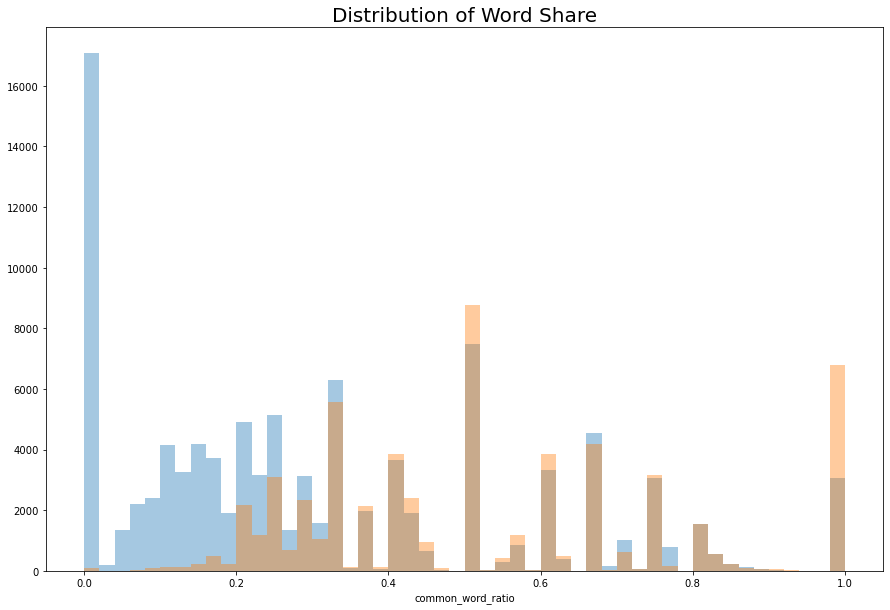

In [66]:
plt.subplots(figsize = (15,10))
sns.distplot(df[df.is_duplicate == 0].common_word_ratio, kde=False, hist=True, label = 'Not Duplicate')
sns.distplot(df[df.is_duplicate ==1].common_word_ratio, kde = False, hist=True, label = 'Duplicate')
plt.title('Distribution of Word Share', size = 20)

In [67]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'unigram_ques1', 'unigram_ques2', 'freq_qid1', 'freq_qid2', 'q1len',
       'q2len', 'q1_n_words', 'q2_n_words', 'word_share', 'common_word_ratio',
       'words', 'cleanQ1', 'cleanQ2', 'fuzz_ratio', 'Partial_Ratio',
       'Token_Sort_Ratio', 'Token_Set_Ratio'],
      dtype='object')

In [73]:
df = df[['id', 'is_duplicate', 'common_word_ratio', 'fuzz_ratio', 'Partial_Ratio', 'Token_Sort_Ratio', 
         'Token_Set_Ratio', 'cleanQ1', 'cleanQ2']]

In [74]:
df.head()

,id,is_duplicate,common_word_ratio,fuzz_ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,cleanQ1,cleanQ2
0,124269,0,0.125,28,38,43,46,legal ethic issu relat boyt good untri,polit divis issu untri would bizarr peopl untr...
1,227472,0,0.000,17,26,21,21,remov democraci india,biggest blunder made vajpaye govern
2,15911,0,0.600,88,89,87,88,watch fox news addict,watch fox news bad
3,326085,1,0.400,71,76,70,79,arnab goswami quit time,arnab goswami resign
4,237728,1,1.000,100,100,100,100,best friend date crush,best friend date crush


In [70]:
df.to_csv('../data/processed/featured_data.csv', index = False)

In [75]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers.merge import concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import StandardScaler

In [77]:
# df_random = df.drop(['id', 'qid1', 'qid2', 'question1', 'question2', 'words',
#                     'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share',
#                      'freq_qid1', 'freq_qid2'], axis=1).sample(frac=0.4).reset_index(drop=True)

df_random = df.copy()

In [78]:
df_random.shape

(161582, 9)

In [79]:
X = df_random.drop(['is_duplicate'], axis=1)
y = df_random['is_duplicate']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [81]:
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [82]:
df_train.head()

,id,common_word_ratio,fuzz_ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,cleanQ1,cleanQ2,is_duplicate
0,256884,0.100000,55,61,57,60,write script street play hindi,learn movi script write new delhi,0
1,375287,0.111111,55,59,73,74,best way get knot hair,brush hair without get knot,0
2,253176,0.285714,52,67,88,100,gain weight healthi way,healthi way gain weight muscl,1
3,367907,0.153846,46,49,49,52,way get detail gmail id user detail googl,safe enter credit card detail purchas googl play,0
4,89563,0.250000,47,64,45,56,would name first town loni mar,first satellit sent mar,0


In [83]:
BASE_DIR = '../data/'
GLOVE_DIR = BASE_DIR + 'interim/'
# TRAIN_DATA_FILE = BASE_DIR + 'processed/train.csv'
# TEST_DATA_FILE = BASE_DIR + 'processed/test.csv'
MAX_SEQUENCE_LENGTH = 40
MAX_NB_WORDS = 400000
EMBEDDING_DIM = 300
# VALIDATION_SPLIT = 0.01

In [84]:
print('Indexing word vectors.')
embeddings_index = {}
f = codecs.open(os.path.join(GLOVE_DIR, 'glove.6B.300d.txt'), encoding='utf-8')
for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [85]:
df_train.head()

,id,common_word_ratio,fuzz_ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,cleanQ1,cleanQ2,is_duplicate
0,256884,0.100000,55,61,57,60,write script street play hindi,learn movi script write new delhi,0
1,375287,0.111111,55,59,73,74,best way get knot hair,brush hair without get knot,0
2,253176,0.285714,52,67,88,100,gain weight healthi way,healthi way gain weight muscl,1
3,367907,0.153846,46,49,49,52,way get detail gmail id user detail googl,safe enter credit card detail purchas googl play,0
4,89563,0.250000,47,64,45,56,would name first town loni mar,first satellit sent mar,0


In [86]:
X_train = df_train.drop('is_duplicate', axis=1)
y_train = df_train['is_duplicate']
X_train = df_test.drop('is_duplicate', axis=1)
y_train = df_test['is_duplicate']

In [89]:


tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df_train['cleanQ1']+ df_train['cleanQ2'])

sequences_1 = tokenizer.texts_to_sequences(df_train['cleanQ1'])
sequences_2 = tokenizer.texts_to_sequences(df_train['cleanQ2'])


word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

train_data_1 = pad_sequences(sequences_1, maxlen=MAX_SEQUENCE_LENGTH)
train_data_2 = pad_sequences(sequences_2, maxlen=MAX_SEQUENCE_LENGTH)
train_labels = np.array(df_train['is_duplicate'])
print('Shape of data tensor:', train_data_1.shape)
print('Shape of label tensor:', train_labels.shape)

train_data_3 = df_train[['common_word_ratio', 'fuzz_ratio']].values

Found 35218 unique tokens
Shape of data tensor: (129265, 40)
Shape of label tensor: (129265,)


In [90]:
test_sequences_1 = tokenizer.texts_to_sequences(df_test['cleanQ1'])
test_sequences_2 = tokenizer.texts_to_sequences(df_test['cleanQ2'])
test_data_1 = pad_sequences(test_sequences_1, maxlen=MAX_SEQUENCE_LENGTH)
test_data_2 = pad_sequences(test_sequences_2, maxlen=MAX_SEQUENCE_LENGTH)
test_ids = np.array(df_test['is_duplicate'])

In [91]:
train_data_1 =  pd.concat([pd.DataFrame(train_data_1), df_train[['common_word_ratio', 'fuzz_ratio']]], axis=1).values
train_data_2 =  pd.concat([pd.DataFrame(train_data_2), df_train[['common_word_ratio', 'fuzz_ratio']]], axis=1).values
test_data_1 =  pd.concat([pd.DataFrame(test_data_1), df_train[['common_word_ratio', 'fuzz_ratio']]], axis=1).values
test_data_2 =  pd.concat([pd.DataFrame(test_data_2), df_train[['common_word_ratio', 'fuzz_ratio']]], axis=1).values

In [92]:
########################################
## prepare embeddings
########################################
print('Preparing embedding matrix')

nb_words = max(MAX_NB_WORDS, len(word_index))+1

embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Preparing embedding matrix
Null word embeddings: 379845


In [93]:
num_lstm = np.random.randint(175, 275)
num_dense = np.random.randint(100, 150)
rate_drop_lstm = 0.15 + np.random.rand() * 0.25
rate_drop_dense = 0.15 + np.random.rand() * 0.25

act = 'relu'
re_weight = True # whether to re-weight classes to fit the 17.5% share in test set



In [94]:
STAMP = 'lstm_%d_%d_%.2f_%.2f'%(num_lstm, num_dense, rate_drop_lstm, \
        rate_drop_dense)

In [95]:
VALIDATION_SPLIT = 0.01
########################################
## sample train/validation data
########################################
#np.random.seed(1234)
perm = np.random.permutation(len(train_data_1))
idx_train = perm[:int(len(train_data_1)*(1-VALIDATION_SPLIT))]
idx_val = perm[int(len(train_data_1)*(1-VALIDATION_SPLIT)):]

data_1_train = np.vstack((train_data_1[idx_train], train_data_2[idx_train]))
data_2_train = np.vstack((train_data_2[idx_train], train_data_1[idx_train]))

labels_train = np.concatenate((train_labels[idx_train], train_labels[idx_train]))

data_1_val = np.vstack((train_data_1[idx_val], train_data_2[idx_val]))
data_2_val = np.vstack((train_data_2[idx_val], train_data_1[idx_val]))
labels_val = np.concatenate((train_labels[idx_val], train_labels[idx_val]))

weight_val = np.ones(len(labels_val))
if re_weight:
    weight_val *= 0.472001959
    weight_val[labels_val==0] = 1.309028344

In [96]:
########################################
## define the model structure
########################################
embedding_layer = Embedding(nb_words,
        EMBEDDING_DIM,
        weights=[embedding_matrix],
        input_length=MAX_SEQUENCE_LENGTH+2,
        trainable=False)
lstm_layer = LSTM(num_lstm, dropout=rate_drop_lstm, recurrent_dropout=rate_drop_lstm)

sequence_1_input = Input(shape=(MAX_SEQUENCE_LENGTH+2,), dtype='int32')
embedded_sequences_1 = embedding_layer(sequence_1_input)
x1 = lstm_layer(embedded_sequences_1)

sequence_2_input = Input(shape=(MAX_SEQUENCE_LENGTH+2,), dtype='int32')
embedded_sequences_2 = embedding_layer(sequence_2_input)
y1 = lstm_layer(embedded_sequences_2)

merged = concatenate([x1, y1])
merged = Dropout(rate_drop_dense)(merged)
merged = BatchNormalization()(merged)

merged = Dense(num_dense, activation=act)(merged)
merged = Dropout(rate_drop_dense)(merged)
merged = BatchNormalization()(merged)

preds = Dense(1, activation='sigmoid')(merged)

In [97]:
########################################
## add class weight
########################################
if re_weight:
    class_weight = {0: 1.309028344, 1: 0.472001959}
else:
    class_weight = None

In [98]:
########################################
## train the model
########################################

model = Model(inputs=[sequence_1_input, sequence_2_input], \
        outputs=preds)
model.compile(loss='binary_crossentropy',
        optimizer='nadam',
        metrics=['accuracy'])
#model.summary()
print(STAMP)

early_stopping =EarlyStopping(monitor='val_loss', patience=3)
bst_model_path = STAMP + '_12.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

hist = model.fit([data_1_train, data_2_train], labels_train, \
        validation_data=([data_1_val, data_2_val], labels_val, weight_val), \
        epochs=20, batch_size=2048, shuffle=True, \
        class_weight=class_weight, callbacks=[early_stopping, model_checkpoint])

model.load_weights(bst_model_path)
bst_val_score = min(hist.history['val_loss'])

lstm_180_143_0.35_0.30
Train on 255944 samples, validate on 2586 samples
Epoch 1/20
255944/255944 [==============================] - 368s 1ms/step - loss: 0.4896 - accuracy: 0.6663 - val_loss: 0.4091 - val_accuracy: 0.6396
Epoch 2/20
255944/255944 [==============================] - 363s 1ms/step - loss: 0.3793 - accuracy: 0.6910 - val_loss: 0.3699 - val_accuracy: 0.6520
Epoch 3/20
255944/255944 [==============================] - 361s 1ms/step - loss: 0.3579 - accuracy: 0.7011 - val_loss: 0.3469 - val_accuracy: 0.6825
Epoch 4/20
255944/255944 [==============================] - 358s 1ms/step - loss: 0.3470 - accuracy: 0.7109 - val_loss: 0.3344 - val_accuracy: 0.7166
Epoch 5/20
255944/255944 [==============================] - 358s 1ms/step - loss: 0.3384 - accuracy: 0.7203 - val_loss: 0.3278 - val_accuracy: 0.7258
Epoch 6/20
255944/255944 [==============================] - 360s 1ms/step - loss: 0.3313 - accuracy: 0.7285 - val_loss: 0.3244 - val_accuracy: 0.7367
Epoch 7/20
255944/255944 [=

In [99]:

preds = model.predict([test_data_1, test_data_2], batch_size=8192, verbose=1)
preds += model.predict([test_data_2, test_data_1], batch_size=8192, verbose=1)
preds /= 2

 24576/129265 [====>.........................] - ETA: 58s 

InvalidArgumentError:  indices[7741,0] = -2147483648 is not in [0, 400001)
	 [[node embedding_1/embedding_lookup (defined at C:\Users\JShah\Anaconda3\envs\8387\lib\site-packages\keras\backend\tensorflow_backend.py:3007) ]] [Op:__inference_keras_scratch_graph_16986]

Function call stack:
keras_scratch_graph
